## <font color='blue'>github.com/uieyao1199
## Birth Weight Analysis and Model Prediction

In [2]:
# Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # regression modeling

# Importing new libraries
from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
import statsmodels.formula.api as smf # regression modeling
import sklearn.metrics # more metrics for model performance evaluation
from sklearn.model_selection import cross_val_score # k-folds cross validation

In [3]:
file = 'birthweight_feature_set.xlsx'
birth = pd.read_excel(file)

## 1.0 Foundamental Data Exploration  

In [4]:
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght'],
      dtype='object')

In [5]:
print(birth.head())

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  


In [6]:
birth.shape

(196, 18)

In [7]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
mage      196 non-null int64
meduc     193 non-null float64
monpre    196 non-null int64
npvis     193 non-null float64
fage      196 non-null int64
feduc     189 non-null float64
omaps     196 non-null int64
fmaps     196 non-null int64
cigs      196 non-null int64
drink     196 non-null int64
male      196 non-null int64
mwhte     196 non-null int64
mblck     196 non-null int64
moth      196 non-null int64
fwhte     196 non-null int64
fblck     196 non-null int64
foth      196 non-null int64
bwght     196 non-null int64
dtypes: float64(3), int64(15)
memory usage: 27.6 KB


In [8]:
birth.describe().round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


## 2.0 Imputing Missing Value

In [9]:
print(
      birth
      .isnull()
      .sum()
      )

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


#### 2.1 Creating Columns for missing value flagging

In [10]:
for col in birth:

    """ Create columns that are 0s if a value was not missing and 1 if
    a value is missing. """
    
    if birth[col].isnull().any():
        birth['m_'+col] = birth[col].isnull().astype(int)
        
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,1,0,0,1,0,0,1956,0,0,0


In [11]:
df_dropped = birth.dropna()

#### 2.2 Distribution plots of variables with missing values 

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


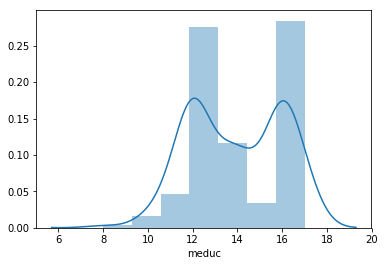

In [12]:
sns.distplot(df_dropped['meduc'])

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


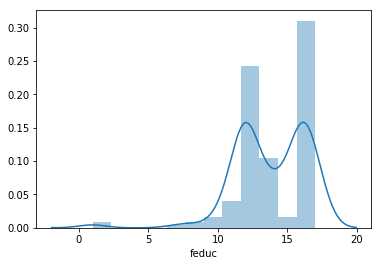

In [13]:
sns.distplot(df_dropped['feduc'])

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


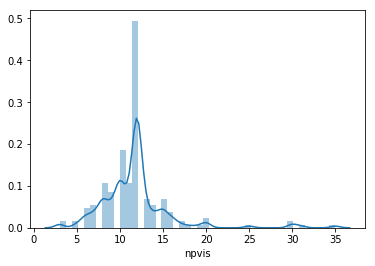

In [14]:
sns.distplot(df_dropped['npvis'])

#### 2.3 Inputting missing value 
it seems reasonable to replace missing values with median of each variable

In [15]:
fill_median = birth['meduc'].median()
birth['meduc'] = birth['meduc'].fillna(fill_median)

fill_median = birth['feduc'].median()
birth['feduc'] = birth['feduc'].fillna(fill_median)

fill_median = birth['npvis'].median()
birth['npvis'] = birth['npvis'].fillna(fill_median)

Check if there is any missing value not replaced

In [16]:
print(
      birth
      .isnull()
      .any()
      .any()
      )

False


## 3.0 Distribution Plots for all variables

#### 3.1 Distplot:
        - mage
        - meduc
        - fage
        - feduc


/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


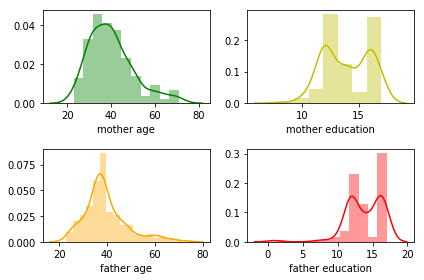

In [17]:
plt.subplot(2, 2, 1)
sns.distplot(birth['mage'],
             color = 'g')

plt.xlabel('mother age')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['meduc'],
             color = 'y')

plt.xlabel('mother education')



########################

plt.subplot(2, 2, 3)
sns.distplot(birth['fage'],
             color = 'orange')

plt.xlabel('father age')



########################

plt.subplot(2, 2, 4)
sns.distplot(birth['feduc'],
             color = 'r')

plt.xlabel('father education')


########################

plt.tight_layout()
plt.savefig('Bwght Data Histograms 1 of 3.png')

plt.show()

#### 3.2 Distplot:
        - monpre
        - npvis
        - omaps
        - fmaps

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


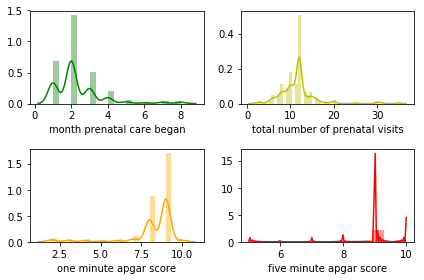

In [18]:
plt.subplot(2, 2, 1)
sns.distplot(birth['monpre'],
             color = 'g')

plt.xlabel('month prenatal care began')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['npvis'],
             color = 'y')

plt.xlabel('total number of prenatal visits')



########################

plt.subplot(2, 2, 3)
sns.distplot(birth['omaps'],
             color = 'orange')

plt.xlabel('one minute apgar score')



########################

plt.subplot(2, 2, 4)
sns.distplot(birth['fmaps'],
             color = 'r')

plt.xlabel('five minute apgar score')


########################

plt.tight_layout()
plt.savefig('Bwght Data Histograms 2 of 3.png')

plt.show()

#### 3.3 Distplot:
        - cigs
        - drink
        - male

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


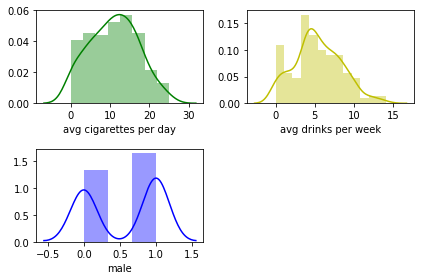

In [19]:
plt.subplot(2, 2, 1)
sns.distplot(birth['cigs'],
             color = 'g')

plt.xlabel('avg cigarettes per day')


########################


plt.subplot(2, 2, 2)
sns.distplot(birth['drink'],
             color = 'y')

plt.xlabel('avg drinks per week')


########################

plt.subplot(2, 2, 3)
sns.distplot(birth['male'],
             color = 'b')

plt.xlabel('male')

########################

plt.tight_layout()
plt.savefig('Bwght Data Histograms 3 of 3.png')

plt.show()

#### 3.4 Distplot: demographics
        - mwhte
        - mblck
        - moth
        - fwhte
        - fblck
        - foth

/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/uieyao/anaconda3/lib/pyth

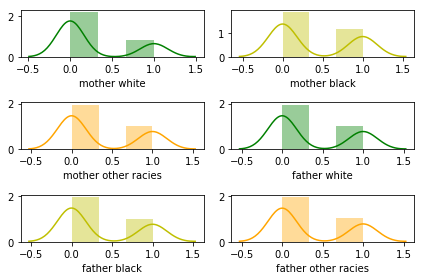

In [20]:
plt.subplot(3, 2, 1)
sns.distplot(birth['mwhte'],
             color = 'g')

plt.xlabel('mother white')


########################


plt.subplot(3, 2, 2)
sns.distplot(birth['mblck'],
             color = 'y')

plt.xlabel('mother black')


########################

plt.subplot(3, 2, 3)
sns.distplot(birth['moth'],
             color = 'orange')

plt.xlabel('mother other racies')

########################

plt.subplot(3, 2, 4)
sns.distplot(birth['fwhte'],
             color = 'g')

plt.xlabel('father white')


########################


plt.subplot(3, 2, 5)
sns.distplot(birth['fblck'],
             color = 'y')

plt.xlabel('father black')



########################

plt.subplot(3, 2, 6)
sns.distplot(birth['moth'],
             color = 'orange')

plt.xlabel('father other racies')

plt.tight_layout()
plt.savefig('Bwght Demographic Histograms.png')

plt.show()

## 4.0 Outlier Flagging

#### 4.1 check quantile distribution

In [21]:
birth_quantiles_1 = birth.loc[:, :].quantile([0.05,
                                                0.40,
                                                0.60,
                                                0.80,
                                                0.95])
print(birth_quantiles_1)

      mage  meduc  monpre  npvis   fage  feduc  omaps  fmaps  cigs  drink  \
0.05  27.0   11.0     1.0   6.00  26.00   11.0    4.0    8.0   1.0    0.0   
0.40  37.0   13.0     2.0  11.00  36.00   12.0    8.0    9.0   9.0    4.0   
0.60  41.0   14.0     2.0  12.00  39.00   16.0    9.0    9.0  13.0    6.0   
0.80  48.0   16.0     3.0  13.00  45.00   16.0    9.0    9.0  16.0    8.0   
0.95  61.0   17.0     5.0  17.25  58.25   17.0    9.0   10.0  21.0   10.0   

       ...     mwhte  mblck  moth  fwhte  fblck  foth   bwght  m_meduc  \
0.05   ...       0.0    0.0   0.0    0.0    0.0   0.0  2244.5      0.0   
0.40   ...       0.0    0.0   0.0    0.0    0.0   0.0  3203.0      0.0   
0.60   ...       0.0    0.0   0.0    0.0    0.0   0.0  3629.0      0.0   
0.80   ...       1.0    1.0   1.0    1.0    1.0   1.0  3827.0      0.0   
0.95   ...       1.0    1.0   1.0    1.0    1.0   1.0  4213.5      0.0   

      m_npvis  m_feduc  
0.05      0.0      0.0  
0.40      0.0      0.0  
0.60      0.0    

#### 4.2 Boxplot of all variables

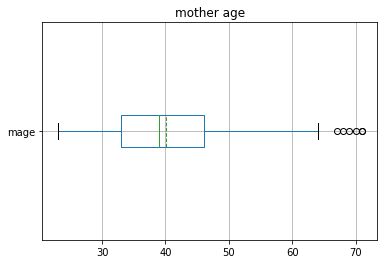

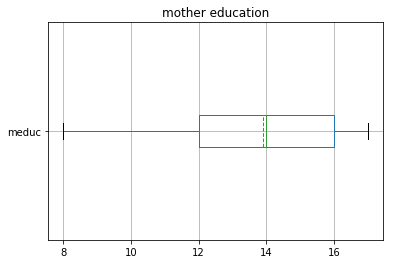

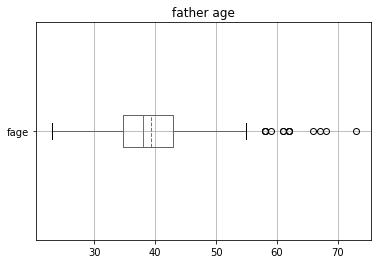

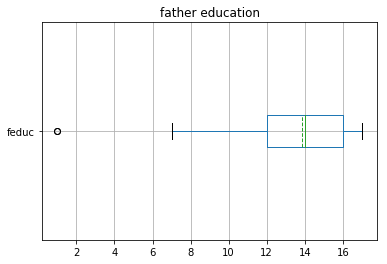

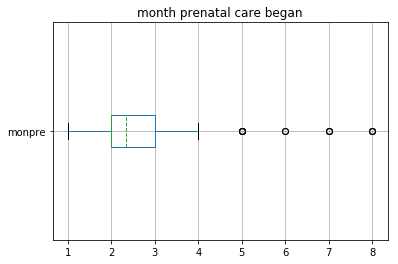

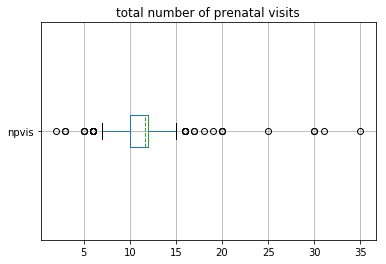

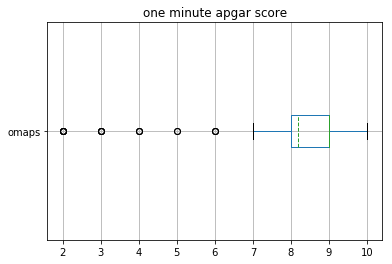

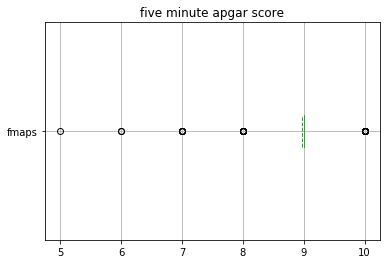

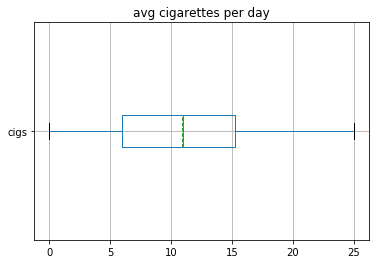

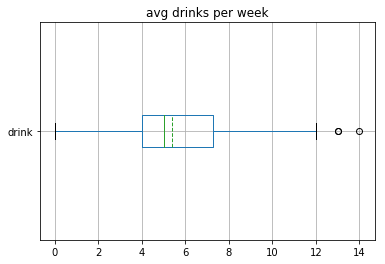

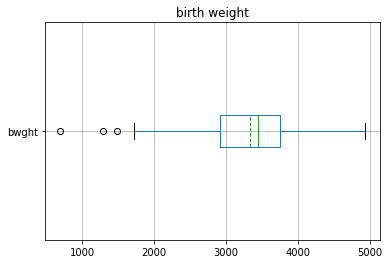

In [22]:
########################
# mage

birth.boxplot(column = ['mage'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("mother age")
plt.suptitle("")
plt.show()

########################
# meduc

birth.boxplot(column = ['meduc'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("mother education")
plt.suptitle("")
plt.show()

########################
# fage

birth.boxplot(column = ['fage'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("father age")
plt.suptitle("")
plt.show()

########################
# feduc

birth.boxplot(column = ['feduc'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("father education")
plt.suptitle("")
plt.show()

########################
# monpre

birth.boxplot(column = ['monpre'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("month prenatal care began")
plt.suptitle("")
plt.show()

########################
# npvis

birth.boxplot(column = ['npvis'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("total number of prenatal visits")
plt.suptitle("")
plt.show()

########################
# omaps

birth.boxplot(column = ['omaps'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("one minute apgar score")
plt.suptitle("")
plt.show()

########################
# fmaps

birth.boxplot(column = ['fmaps'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("five minute apgar score")
plt.suptitle("")
plt.show()

########################
# cigs

birth.boxplot(column = ['cigs'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("avg cigarettes per day")
plt.suptitle("")
plt.show()

########################
# drink

birth.boxplot(column = ['drink'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("avg drinks per week")
plt.suptitle("")
plt.show()


########################
# bwght

birth.boxplot(column = ['bwght'],
                vert = False,
                patch_artist = False,
                meanline = True,
                showmeans = True)

plt.title("birth weight")
plt.suptitle("")


plt.show()

#### 4.3 Identify outlier thresholds of necessary variables
        - mage
        - fage
        - feduc
        - monpre
        - npvis
        - omaps
        - fmaps
        - drink
        - bwght

In [23]:
# Outlier thresholds

mage_hi = 64

fage_hi  = 55

feduc_lo = 7

monpre_hi = 4

npvis_hi = 15

npvis_lo = 7

omaps_lo = 7

fmaps_hi = 9 

fmaps_lo = 9 

drink_hi = 12

bwght_lo = 1700

#### 4.4 Outlier Flagging 

In [24]:
########################
# mage

birth['out_mage'] = 0


for val in enumerate(birth.loc[ : , 'mage']):
    
    if val[1] >= mage_hi:
        birth.loc[val[0], 'out_mage'] = 1

In [25]:
########################
# fage

birth['out_fage'] = 0


for val in enumerate(birth.loc[ : , 'fage']):
    
    if val[1] >= fage_hi:
        birth.loc[val[0], 'out_fage'] = 1

In [26]:
########################
# feduc

birth['out_feduc'] = 0


for val in enumerate(birth.loc[ : , 'feduc']):
    
    if val[1] <= feduc_lo:
        birth.loc[val[0], 'out_feduc'] = -1


In [27]:
########################
# monpre

birth['out_monpre'] = 0


for val in enumerate(birth.loc[ : , 'monpre']):
    
    if val[1] >= monpre_hi:
        birth.loc[val[0], 'out_monpre'] = 1

In [28]:
########################
# npvis

birth['out_npvis'] = 0


for val in enumerate(birth.loc[ : , 'npvis']):
    
    if val[1] >= npvis_hi:
        birth.loc[val[0], 'out_npvis'] = 1


for val in enumerate(birth.loc[ : , 'npvis']):
    
    if val[1] <= npvis_lo:
        birth.loc[val[0], 'out_npvis'] = -1

In [29]:
########################
# omaps

birth['out_omaps'] = 0


for val in enumerate(birth.loc[ : , 'omaps']):
    
    if val[1] <= omaps_lo:
        birth.loc[val[0], 'out_omaps'] = -1

In [30]:
########################
# fmaps

birth['out_fmaps'] = 0


for val in enumerate(birth.loc[ : , 'fmaps']):
    
    if val[1] < fmaps_lo:
        birth.loc[val[0], 'out_fmaps'] = -1
        
for val in enumerate(birth.loc[ : , 'fmaps']):
    
    if val[1] > fage_hi:
        birth.loc[val[0], 'out_fage'] = 1

In [31]:
########################
# drink

birth['out_drink'] = 0


for val in enumerate(birth.loc[ : , 'drink']):
    
    if val[1] >= drink_hi:
        birth.loc[val[0], 'out_drink'] = 1

In [32]:
########################
# bwght

birth['out_bwght'] = 0


for val in enumerate(birth.loc[ : , 'bwght']):
    
    if val[1] <= bwght_lo:
        birth.loc[val[0], 'out_bwght'] = -1


###### checking if all outliers are flagged

In [33]:
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'out_mage',
       'out_fage', 'out_feduc', 'out_monpre', 'out_npvis', 'out_omaps',
       'out_fmaps', 'out_drink', 'out_bwght'],
      dtype='object')

## 5.0 Correlation and Heatmap

#### 5.1 Correlation Analysis

In [34]:
df_corr = birth.corr().round(2)

print(df_corr)

            mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  \
mage        1.00  -0.09    0.16  -0.05  0.58  -0.09  -0.21  -0.24  0.17   
meduc      -0.09   1.00   -0.23   0.14 -0.07   0.62   0.25   0.14  0.10   
monpre      0.16  -0.23    1.00  -0.34  0.04  -0.29  -0.17  -0.08 -0.06   
npvis      -0.05   0.14   -0.34   1.00 -0.06   0.02   0.09   0.09  0.04   
fage        0.58  -0.07    0.04  -0.06  1.00  -0.01  -0.16  -0.20  0.17   
feduc      -0.09   0.62   -0.29   0.02 -0.01   1.00   0.33   0.13  0.05   
omaps      -0.21   0.25   -0.17   0.09 -0.16   0.33   1.00   0.64 -0.15   
fmaps      -0.24   0.14   -0.08   0.09 -0.20   0.13   0.64   1.00 -0.09   
cigs        0.17   0.10   -0.06   0.04  0.17   0.05  -0.15  -0.09  1.00   
drink       0.34  -0.07    0.02  -0.07  0.29  -0.12  -0.18  -0.16  0.36   
male       -0.05  -0.03   -0.08   0.00 -0.09   0.08  -0.01  -0.03 -0.12   
mwhte       0.01  -0.28    0.08   0.04  0.04  -0.41  -0.18  -0.02  0.03   
mblck      -0.02  -0.19  

#### 5.2 Heatmap of original variables

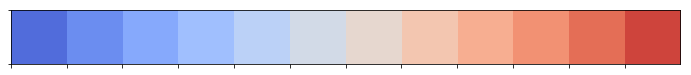

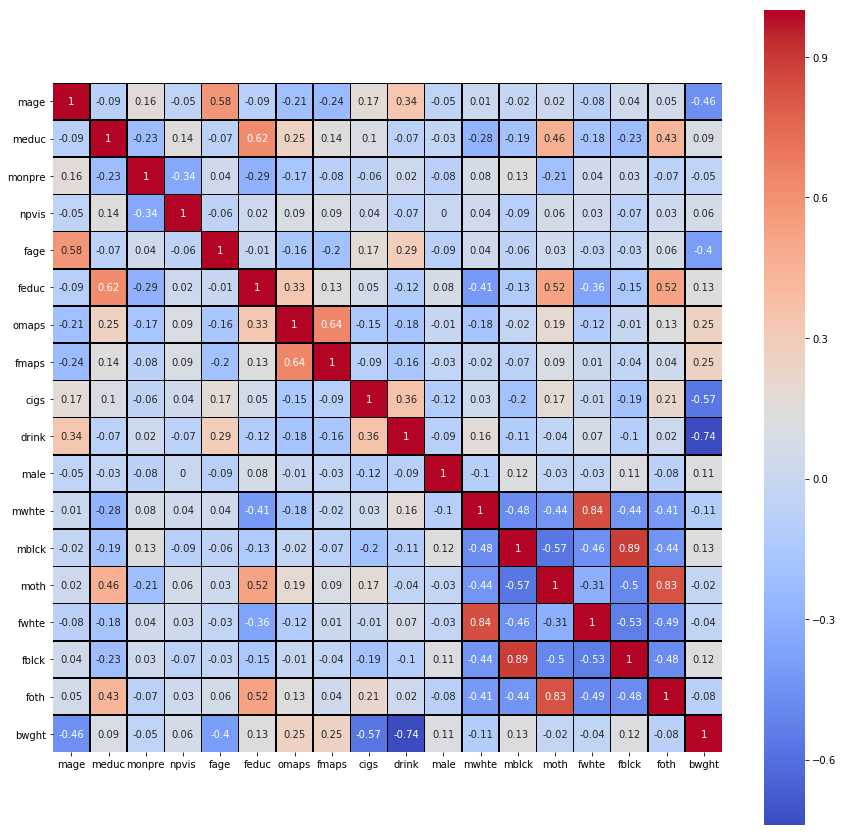

In [35]:
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:18, 0:18]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Bwght Correlation Heatmap 1.png')

plt.show()

#### 5.3 Heatmap of all variables (with missing values and outlier flagging0

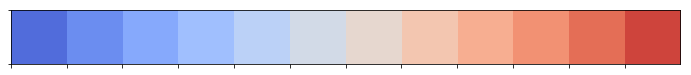

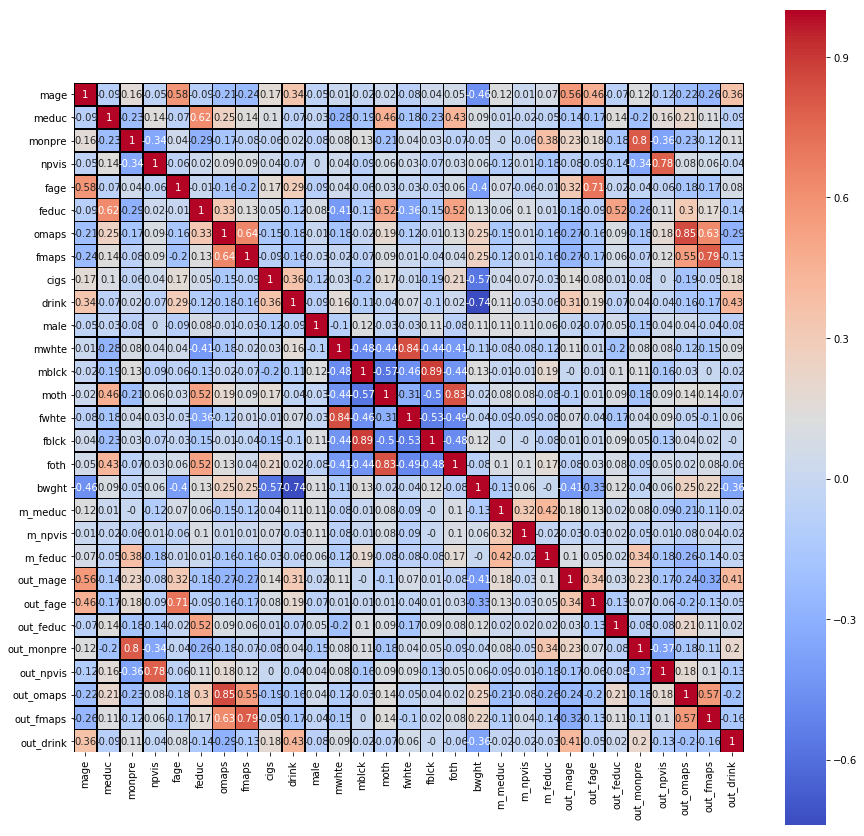

In [36]:
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:29, 0:29]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Bwght Correlation Heatmap 2.png')

plt.show()

#### 5.4 Save the explored dataset into excel and re-read

In [37]:
birth.to_excel('bw_feature_explored.xlsx')

file = 'bw_feature_explored.xlsx'
birth = pd.read_excel(file)

In [38]:
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'out_mage',
       'out_fage', 'out_feduc', 'out_monpre', 'out_npvis', 'out_omaps',
       'out_fmaps', 'out_drink', 'out_bwght'],
      dtype='object')


## 6.0 Full Model Regression

In [39]:
lm_full = smf.ols(formula = """bwght ~ birth['mage'] +
                                           birth['meduc'] +
                                           birth['fage'] +
                                           birth['feduc'] +
                                           birth['monpre'] +
                                           birth['npvis'] +
                                           birth['omaps'] +
                                           birth['fmaps'] +
                                           birth['cigs'] +
                                           birth['drink'] +
                                           birth['male'] +
                                           birth['mwhte'] +
                                           birth['mblck'] +
                                           birth['moth'] +
                                           birth['fwhte'] +
                                           birth['fblck'] +
                                           birth['foth'] +
                                           birth['m_meduc'] +
                                           birth['m_feduc'] +
                                           birth['m_npvis'] +
                                           birth['out_mage'] +
                                           birth['out_fage'] +
                                           birth['out_feduc'] +
                                           birth['out_monpre'] +
                                           birth['out_npvis'] +
                                           birth['out_omaps'] +
                                           birth['out_fmaps'] +
                                           birth['out_drink']""",
                         data = birth)


# Fitting Results
results = lm_full.fit()

print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           2.07e-37
Time:                        21:52:42   Log-Likelihood:                -1412.6
No. Observations:                 196   AIC:                             2879.
Df Residuals:                     169   BIC:                             2968.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2099.4711    

## 7.0 KNN Full Model

#### 7.1 Generalization using Train/Test Split

In [40]:
birth_data   = birth.drop(['bwght'], axis =1)
birth_target = birth.loc[:, 'bwght']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.1,
            random_state = 508)

# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)


(176, 29)
(176,)
(20, 29)
(20,)


#### 7.2 Forming a Machine Learning Base with KNN, neighbors=1

In [42]:
# Step 1: Create a model object, Creating a regressor object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)

# Checking the type of this new object
type(knn_reg)

sklearn.neighbors.regression.KNeighborsRegressor

In [43]:
# Step 2: Teaching (fitting) the algorithm based on the training data
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [44]:
# Step 3: Predicting on the X_data that the model has never seen before
y_pred_train = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)

In [45]:
# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")


Test set predictions:
[3710. 4139. 2900. 3180. 3792. 3714. 3950. 2637. 2855. 3970. 3030. 2799.
 2608. 2920. 2770. 4470. 3714. 3647. 3150. 3050.]



In [46]:
# Step 4: Calling the score method, which compares the predicted values to the actual values
y_score_train = knn_reg.score(X_train, y_train)
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_train)
print(y_score)

1.0
-0.4590581986241395


#### 7.3 Finding the Optimal number of Neighbors

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.10,
            random_state = 508)

In [48]:
# Creating two lists, one for training set accuracy and the other for test
# set accuracy
training_accuracy = []
test_accuracy = []

# Building a visualization to check to see  1 to 50
neighbors_settings = range(1, 51)

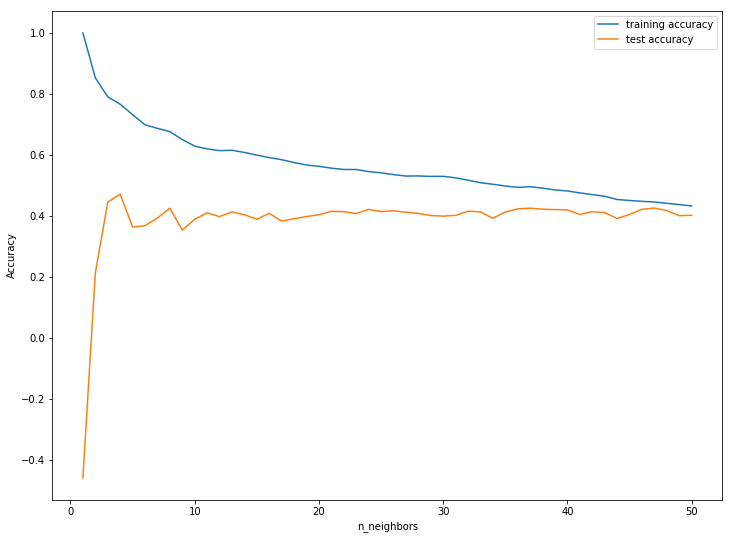

In [49]:
for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [50]:
print(test_accuracy)

[-0.4590581986241395, 0.21093637950397126, 0.4446915374770653, 0.4706195914170125, 0.36327149371120826, 0.3674749594138149, 0.39286661619218, 0.4248416597161684, 0.3532486236993252, 0.38844484477596364, 0.40975416166866835, 0.39735222929245484, 0.4127703351477305, 0.4034253098242093, 0.38889497976972776, 0.4082675829686537, 0.38250073951337527, 0.39046936555877976, 0.39743995690709355, 0.40338445807375656, 0.4146096568916147, 0.4135200491047582, 0.4072066542846775, 0.4210420033188429, 0.41399459413278067, 0.4162402296477762, 0.41161702733743494, 0.40789422766994116, 0.40095867271607144, 0.3989796601949982, 0.4012347348999704, 0.4150100589057749, 0.41284780253976167, 0.39189091153896416, 0.41246264809753624, 0.422697321039748, 0.4250577485773363, 0.42180346088271287, 0.42012567473578255, 0.4193575560211772, 0.4043916081999741, 0.41339758709880925, 0.41031232685258234, 0.3911383688926905, 0.4042585067763199, 0.42126961926492335, 0.42538669226216375, 0.41722897118893604, 0.400494772009317

##### The best results occur when k = 3

In [51]:
print("The optimal number of neighbors is", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

The optimal number of neighbors is 3 with an optimal score of 0.4706195914170125


#### 7.4 KNN Full Model Prediction with optimal neighbor = 3

In [52]:
# Building a model with k = 3
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 3)

# Fitting the model based on the training data
knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_train = knn_reg.score(X_train, y_train)
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_train)
print(y_score)


0.790222173458878
0.4446915374770653


In [53]:
print(f"""
Our base to compare other models is {y_score.round(3)}.
    
This base helps us evaluate more complicated models and lets us consider
tradeoffs between accuracy and interpretability.
""")


Our base to compare other models is 0.445.
    
This base helps us evaluate more complicated models and lets us consider
tradeoffs between accuracy and interpretability.



# Optimize the Model
## 8.0 Setting Group and dummies

#### 8.1 Monpre Grouping and dummy
        - 1 month is considered to be early begin
        - between 2 month to 4 month is general level 
        - later than 5 month is considered late begin

In [54]:
monpre_early = 1
monpre_late = 5

birth['monpre_group'] = 0

for val in enumerate(birth.loc[ : , 'monpre']):
    
    if val[1] == monpre_early:
        birth.loc[val[0], 'monpre_group'] = 'monpre_early'
    
    elif val[1] >= monpre_late:
        birth.loc[val[0], 'monpre_group'] = 'monpre_late'
    
    else:
        birth.loc[val[0], 'monpre_group'] = 'monpre_general'

In [55]:
monpre_dummy = pd.get_dummies(birth['monpre_group'])
monpre_dummy.head()

,monpre_early,monpre_general,monpre_late
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [56]:
birth = birth.drop(columns=['monpre'],axis =1)
birth = birth.drop(columns=['monpre_group'],axis =1)
birth = pd.concat([birth, monpre_dummy], axis=1)
birth.head()

,mage,meduc,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,...,out_feduc,out_monpre,out_npvis,out_omaps,out_fmaps,out_drink,out_bwght,monpre_early,monpre_general,monpre_late
0,69,14,2,62,14,4,7,23,9,1,...,0,1,-1,-1,-1,0,-1,0,0,1
1,68,12,10,61,11,4,6,25,11,1,...,0,0,0,-1,-1,0,-1,0,1,0
2,71,12,6,46,12,2,7,21,12,1,...,0,0,-1,-1,-1,1,-1,0,1,0
3,59,16,8,48,16,7,8,21,10,0,...,0,0,0,-1,-1,0,0,1,0,0
4,48,12,6,39,12,2,9,17,13,0,...,0,1,-1,-1,0,1,0,0,1,0


#### 8.2 npvis Grouping and dummy
        - visit less than 10 times is considered low 
        - visit between 10 and 15 times is general 
        - visit more than 15 time high frequency

In [57]:
npvis_lo = 10
npvis_hi = 15

birth['npvis_group'] = 0

for val in enumerate(birth.loc[ : , 'npvis']):
    
    if val[1] < npvis_lo:
        birth.loc[val[0], 'npvis_group'] = 'npvis_low'
    
    elif val[1] > npvis_hi:
        birth.loc[val[0], 'npvis_group'] = 'npvis_high'
    
    else:
        birth.loc[val[0], 'npvis_group'] = 'npvis_general'

In [58]:
npvis_dummy = pd.get_dummies(birth['npvis_group'])
npvis_dummy.head()

,npvis_general,npvis_high,npvis_low
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [59]:
birth = birth.drop(columns=['npvis'],axis =1)
birth = birth.drop(columns=['npvis_group'],axis =1)
birth = pd.concat([birth, npvis_dummy], axis=1)
birth.head()

,mage,meduc,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,...,out_omaps,out_fmaps,out_drink,out_bwght,monpre_early,monpre_general,monpre_late,npvis_general,npvis_high,npvis_low
0,69,14,62,14,4,7,23,9,1,0,...,-1,-1,0,-1,0,0,1,0,0,1
1,68,12,61,11,4,6,25,11,1,1,...,-1,-1,0,-1,0,1,0,1,0,0
2,71,12,46,12,2,7,21,12,1,0,...,-1,-1,1,-1,0,1,0,0,0,1
3,59,16,48,16,7,8,21,10,0,0,...,-1,-1,0,0,1,0,0,0,0,1
4,48,12,39,12,2,9,17,13,0,1,...,-1,0,1,0,0,1,0,0,0,1


#### 8.3 fage Grouping
        - less than 25 years-old is considered to be yound age
        - between 25 and 40 years-old is considered to be general age 
        - less than 25 years-old is considered to be old age

In [60]:
fage_lo = 25
fage_hi = 40

birth['fage_group'] = 0

for val in enumerate(birth.loc[ : , 'fage']):
    
    if val[1] < fage_lo:
        birth.loc[val[0], 'fage_group'] = 'fage_young'
    
    elif val[1] > fage_hi:
        birth.loc[val[0], 'fage_group'] = 'fage_old'
    
    else:
        birth.loc[val[0], 'fage_group'] = 'fage_general'

In [61]:
fage_dummy = pd.get_dummies(birth['fage_group'])
fage_dummy.head()

,fage_general,fage_old,fage_young
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [62]:
birth = birth.drop(columns=['fage'],axis =1)
birth = birth.drop(columns=['fage_group'],axis =1)
birth = pd.concat([birth, fage_dummy], axis=1)
birth.head()

,mage,meduc,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,...,out_bwght,monpre_early,monpre_general,monpre_late,npvis_general,npvis_high,npvis_low,fage_general,fage_old,fage_young
0,69,14,14,4,7,23,9,1,0,1,...,-1,0,0,1,0,0,1,0,1,0
1,68,12,11,4,6,25,11,1,1,0,...,-1,0,1,0,1,0,0,0,1,0
2,71,12,12,2,7,21,12,1,0,1,...,-1,0,1,0,0,0,1,0,1,0
3,59,16,16,7,8,21,10,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,48,12,12,2,9,17,13,0,1,0,...,0,0,1,0,0,0,1,1,0,0


#### 8.4 feduc Grouping 
        - less than 12 years of education is low educated
        - between 12 and 16 years of education is general educated
        - greater than 16 years of education is high educated

In [63]:
feduc_line = 12
feduc_line_2 = 16

birth['feduc_group'] = 0

for val in enumerate(birth.loc[ : , 'feduc']):
    
    if val[1] < feduc_line:
        birth.loc[val[0], 'feduc_group'] = 'feduc_low'
        
    elif val[1] > feduc_line_2:
        birth.loc[val[0], 'feduc_group'] = 'feduc_high'
        
    else:
        birth.loc[val[0], 'feduc_group'] = 'feduc_general'

In [64]:
feduc_dummy = pd.get_dummies(birth['feduc_group'])
feduc_dummy.head()

,feduc_general,feduc_high,feduc_low
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [65]:
birth = birth.drop(columns=['feduc'],axis =1)
birth = birth.drop(columns=['feduc_group'],axis =1)
birth = pd.concat([birth, feduc_dummy], axis=1)
birth.head()

,mage,meduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,...,monpre_late,npvis_general,npvis_high,npvis_low,fage_general,fage_old,fage_young,feduc_general,feduc_high,feduc_low
0,69,14,4,7,23,9,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
1,68,12,4,6,25,11,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,71,12,2,7,21,12,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,59,16,7,8,21,10,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
4,48,12,2,9,17,13,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


#### 8.5 meduc Grouping 
        - less than 12 years of education is low educated
        - between 12 and 16 years of education is general educated
        - greater than 16 years of education is high educated

In [66]:
meduc_line = 12
meduc_line_2 = 16

birth['meduc_group'] = 0

for val in enumerate(birth.loc[ : , 'meduc']):
    
    if val[1] < feduc_line:
        birth.loc[val[0], 'meduc_group'] = 'meduc_low'
        
    elif val[1] > feduc_line_2:
        birth.loc[val[0], 'meduc_group'] = 'meduc_high'
        
    else:
        birth.loc[val[0], 'meduc_group'] = 'meduc_general'

In [67]:
meduc_dummy = pd.get_dummies(birth['meduc_group'])
meduc_dummy.head()

,meduc_general,meduc_high,meduc_low
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [68]:
birth = birth.drop(columns=['meduc'],axis =1)
birth = birth.drop(columns=['meduc_group'],axis =1)
birth = pd.concat([birth, meduc_dummy], axis=1)
birth.head()

,mage,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,...,npvis_low,fage_general,fage_old,fage_young,feduc_general,feduc_high,feduc_low,meduc_general,meduc_high,meduc_low
0,69,4,7,23,9,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
1,68,4,6,25,11,1,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,71,2,7,21,12,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
3,59,7,8,21,10,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
4,48,2,9,17,13,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0


#### 8.6 mage Grouping
        - less than 25 years-old is considered to be yound age
        - between 25 and 40 years-old is considered to be general age 
        - less than 25 years-old is considered to be old age

In [69]:
mage_lo = 25
mage_hi = 45

birth['mage_group'] = 0

for val in enumerate(birth.loc[ : , 'mage']):
    
    if val[1] < mage_lo:
        birth.loc[val[0], 'mage_group'] = 'mage_young'
    
    elif val[1] > mage_hi:
        birth.loc[val[0], 'mage_group'] = 'mage_old'
    
    else:
        birth.loc[val[0], 'mage_group'] = 'mage_general'

In [70]:
mage_dummy = pd.get_dummies(birth['mage_group'])
mage_dummy.head()

,mage_general,mage_old,mage_young
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [71]:
birth = birth.drop(columns=['mage'],axis =1)
birth = birth.drop(columns=['mage_group'],axis =1)
birth = pd.concat([birth, mage_dummy], axis=1)
birth.head()

,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,...,fage_young,feduc_general,feduc_high,feduc_low,meduc_general,meduc_high,meduc_low,mage_general,mage_old,mage_young
0,4,7,23,9,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,4,6,25,11,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,2,7,21,12,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,7,8,21,10,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,2,9,17,13,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


#### 8.7 Save the dummy dataset into excel and re-read

In [72]:
birth.to_excel('bw_dummies.xlsx')

file = 'bw_dummies.xlsx'
birth = pd.read_excel(file)

##  9.0 Full Model Regression with dummies

In [73]:
lm_full = smf.ols(formula = """bwght ~ birth['mage_old'] +
                                           birth['mage_general'] +
                                           birth['mage_young'] +
                                           birth['meduc_high'] +
                                           birth['meduc_general'] +
                                           birth['meduc_low'] +
                                           birth['fage_young'] +
                                           birth['fage_general'] +
                                           birth['fage_old'] +
                                           birth['feduc_high'] +
                                           birth['feduc_general'] +
                                           birth['feduc_low'] +
                                           birth['monpre_early'] +
                                           birth['monpre_general'] +
                                           birth['monpre_late'] +
                                           birth['npvis_low'] +
                                           birth['npvis_general'] +
                                           birth['npvis_high'] +
                                           birth['omaps'] +
                                           birth['fmaps'] +
                                           birth['cigs'] +
                                           birth['drink'] +
                                           birth['male'] +
                                           birth['mwhte'] +
                                           birth['mblck'] +
                                           birth['moth'] +
                                           birth['fwhte'] +
                                           birth['fblck'] +
                                           birth['foth'] +
                                           birth['out_mage'] +
                                           birth['out_fage'] +
                                           birth['out_feduc'] +
                                           birth['out_omaps'] +
                                           birth['out_fmaps'] +
                                           birth['out_monpre'] +
                                           birth['out_npvis'] +
                                           birth['out_drink']""",
                         data = birth)


# Fitting Results
results = lm_full.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     16.72
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           1.20e-35
Time:                        21:52:44   Log-Likelihood:                -1412.2
No. Observations:                 196   AIC:                             2884.
Df Residuals:                     166   BIC:                             2983.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 9.1 Analysing Difference between male/female babies

In [74]:
birth_male = birth[birth.male==1]
birth_female = birth[birth.male==0]
birth_male = birth_male.drop(['male'],axis=1)
birth_female = birth_female.drop(['male'],axis=1)

#### 9.1.1 Male Babies Regression

In [75]:
lm_full_male = smf.ols(formula = """bwght ~ birth_male['mage_old'] +
                                           birth_male['mage_general'] +
                                           birth_male['mage_young'] +
                                           birth_male['meduc_high'] +
                                           birth_male['meduc_general'] +
                                           birth_male['meduc_low'] +
                                           birth_male['fage_young'] +
                                           birth_male['fage_general'] +
                                           birth_male['fage_old'] +
                                           birth_male['feduc_high'] +
                                           birth_male['feduc_general'] +
                                           birth_male['feduc_low'] +
                                           birth_male['monpre_early'] +
                                           birth_male['monpre_general'] +
                                           birth_male['monpre_late'] +
                                           birth_male['npvis_low'] +
                                           birth_male['npvis_general'] +
                                           birth_male['npvis_high'] +
                                           birth_male['omaps'] +
                                           birth_male['fmaps'] +
                                           birth_male['cigs'] +
                                           birth_male['drink'] +
                                           birth_male['mwhte'] +
                                           birth_male['mblck'] +
                                           birth_male['moth'] +
                                           birth_male['fwhte'] +
                                           birth_male['fblck'] +
                                           birth_male['foth'] +
                                           birth_male['out_mage'] +
                                           birth_male['out_fage'] +
                                           birth_male['out_feduc'] +
                                           birth_male['out_omaps'] +
                                           birth_male['out_fmaps'] +
                                           birth_male['out_monpre'] +
                                           birth_male['out_npvis'] +
                                           birth_male['out_drink']""",
                         data = birth_male)


# Fitting Results
results = lm_full_male.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     10.16
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           2.20e-16
Time:                        21:52:44   Log-Likelihood:                -771.47
No. Observations:                 108   AIC:                             1601.
Df Residuals:                      79   BIC:                             1679.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

#### 9.1.2 Female Babies Regression

In [76]:
lm_full_female = smf.ols(formula = """bwght ~ birth_female['mage_old'] +
                                           birth_female['mage_general'] +
                                           birth_female['mage_young'] +
                                           birth_female['meduc_high'] +
                                           birth_female['meduc_general'] +
                                           birth_female['meduc_low'] +
                                           birth_female['fage_young'] +
                                           birth_female['fage_general'] +
                                           birth_female['fage_old'] +
                                           birth_female['feduc_high'] +
                                           birth_female['feduc_general'] +
                                           birth_female['feduc_low'] +
                                           birth_female['monpre_early'] +
                                           birth_female['monpre_general'] +
                                           birth_female['monpre_late'] +
                                           birth_female['npvis_low'] +
                                           birth_female['npvis_general'] +
                                           birth_female['npvis_high'] +
                                           birth_female['omaps'] +
                                           birth_female['fmaps'] +
                                           birth_female['cigs'] +
                                           birth_female['drink'] +
                                           birth_female['mwhte'] +
                                           birth_female['mblck'] +
                                           birth_female['moth'] +
                                           birth_female['fwhte'] +
                                           birth_female['fblck'] +
                                           birth_female['foth'] +
                                           birth_female['out_mage'] +
                                           birth_female['out_fage'] +
                                           birth_female['out_feduc'] +
                                           birth_female['out_omaps'] +
                                           birth_female['out_fmaps'] +
                                           birth_female['out_monpre'] +
                                           birth_female['out_npvis'] +
                                           birth_female['out_drink']""",
                         data = birth_female)


# Fitting Results
results = lm_full_female.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     6.618
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           6.07e-10
Time:                        21:52:44   Log-Likelihood:                -628.25
No. Observations:                  88   AIC:                             1314.
Df Residuals:                      59   BIC:                             1386.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Sub-conclusion
1. The effect of whether the baby is male or female to the baby's birth weight is not significant.  And the correlation between the gender of the baby and his/her birth weight is weakly related. Thus, drop 'male' variable for the significant model regression in the following 

2. omaps and fmaps are performed after the kids are born, so its effect on our model is not reasonable in predicting the kid's weight. Thus we remove omaps and fmaps from our model.

## 10.0 Significant Model Regression with selected variables

In [77]:
lm_sig = smf.ols(formula = """bwght ~ birth['mage_young'] +
                                           birth['mage_general'] +
                                           birth['mage_old'] +
                                           birth['meduc_high'] +
                                           birth['meduc_general'] +
                                           birth['meduc_low'] +
                                           birth['fage_young'] +
                                           birth['fage_general'] +
                                           birth['fage_old'] +
                                           birth['feduc_high'] +
                                           birth['feduc_general'] +
                                           birth['feduc_low'] +
                                           birth['monpre_early'] +
                                           birth['monpre_general'] +
                                           birth['monpre_late'] +
                                           birth['npvis_low'] +
                                           birth['npvis_general'] +
                                           birth['npvis_high'] +
                                           birth['cigs'] +
                                           birth['drink'] +
                                           birth['mwhte'] +
                                           birth['mblck'] +
                                           birth['moth'] +
                                           birth['fwhte'] +
                                           birth['fblck'] +
                                           birth['foth'] +
                                           birth['out_mage'] +
                                           birth['out_fage'] +
                                           birth['out_feduc'] +
                                           birth['out_monpre'] +
                                           birth['out_npvis'] +
                                           birth['out_drink']""",
                         data = birth)


# Fitting Results
results = lm_sig.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     20.42
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           2.23e-38
Time:                        21:52:44   Log-Likelihood:                -1413.6
No. Observations:                 196   AIC:                             2877.
Df Residuals:                     171   BIC:                             2959.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

## 11.0 OLS Regression Analysis in statsmodels

In [78]:
birth_data   = birth.drop(['bwght', 
                           'male',
                           'omaps',
                           'fmaps', 
                           'out_omaps',
                           'out_fmaps',
                           'm_meduc',
                           'm_feduc',
                           'm_npvis',
                           'out_bwght'], axis =1)
birth_target = birth.loc[:, 'bwght']

In [79]:
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.10,
                     random_state = 508)

birth_train = pd.concat([X_train, y_train], axis = 1)

In [80]:
lm_train = smf.ols(formula = """bwght ~birth_train['mage_young'] +
                                           birth_train['mage_general'] +
                                           birth_train['mage_old'] +
                                           birth_train['meduc_high'] +
                                           birth_train['meduc_general'] +
                                           birth_train['meduc_low'] +
                                           birth_train['fage_young'] +
                                           birth_train['fage_general'] +
                                           birth_train['fage_old'] +
                                           birth_train['feduc_high'] +
                                           birth_train['feduc_general'] +
                                           birth_train['feduc_low'] +
                                           birth_train['monpre_early'] +
                                           birth_train['monpre_general'] +
                                           birth_train['monpre_late'] +
                                           birth_train['npvis_low'] +
                                           birth_train['npvis_general'] +
                                           birth_train['npvis_high'] +
                                           birth_train['cigs'] +
                                           birth_train['drink'] +
                                           birth_train['mwhte'] +
                                           birth_train['mblck'] +
                                           birth_train['moth'] +
                                           birth_train['fwhte'] +
                                           birth_train['fblck'] +
                                           birth_train['foth'] +
                                           birth_train['out_mage'] +
                                           birth_train['out_fage'] +
                                           birth_train['out_feduc'] +
                                           birth_train['out_monpre'] +
                                           birth_train['out_drink'] +
                                           birth_train['out_npvis']
                                           """,
                         data = birth_train)

results_train = lm_train.fit()
print(results_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     18.99
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           2.96e-34
Time:                        21:52:45   Log-Likelihood:                -1269.6
No. Observations:                 176   AIC:                             2589.
Df Residuals:                     151   BIC:                             2669.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [81]:
birth_test = pd.concat([X_test, y_test], axis = 1)
lm_test = smf.ols(formula = """bwght ~birth_test['mage_old'] +
                                           birth_test['mage_general'] +
                                           birth_test['mage_young'] +
                                           birth_test['meduc_high'] +
                                           birth_test['meduc_general'] +
                                           birth_test['meduc_low'] +
                                           birth_test['fage_young'] +
                                           birth_test['fage_general'] +
                                           birth_test['fage_old'] +
                                           birth_test['feduc_high'] +
                                           birth_test['feduc_general'] +
                                           birth_test['feduc_low'] +
                                           birth_test['monpre_early'] +
                                           birth_test['monpre_general'] +
                                           birth_test['monpre_late'] +
                                           birth_test['npvis_low'] +
                                           birth_test['npvis_general'] +
                                           birth_test['npvis_high'] +
                                           birth_test['cigs'] +
                                           birth_test['drink'] +
                                           birth_test['mwhte'] +
                                           birth_test['mblck'] +
                                           birth_test['moth'] +
                                           birth_test['fwhte'] +
                                           birth_test['fblck'] +
                                           birth_test['foth'] +
                                           birth_test['out_mage'] +
                                           birth_test['out_fage'] +
                                           birth_test['out_feduc'] +
                                           birth_test['out_monpre'] +
                                           birth_test['out_drink'] +
                                           birth_test['out_npvis']
                                           """,
                         data = birth_test)

results_test = lm_test.fit()
print(results_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.9326
Date:                Mon, 04 Mar 2019   Prob (F-statistic):              0.611
Time:                        21:52:45   Log-Likelihood:                -135.14
No. Observations:                  20   AIC:                             304.3
Df Residuals:                       3   BIC:                             321.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/Users/uieyao/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/uieyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### 11.1 Residuals of Training Dataset

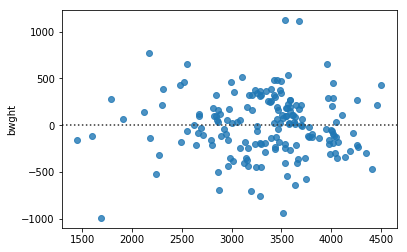

In [82]:
predict = results_train.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results_train.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [birth_train.loc[:,'bwght'],
         y_hat,
         results_train.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Bwght_train Residuals.xlsx')

sns.residplot(x = predict,
              y = birth_train.loc[:,'bwght'])


plt.show()

#### 11.2 Residuals of Testing Dataset

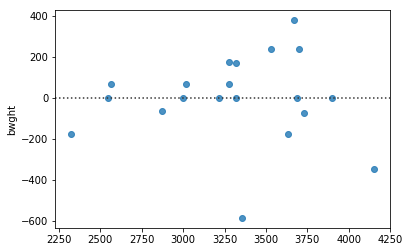

In [83]:
predict = results_test.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results_test.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [birth_train.loc[:,'bwght'],
         y_hat,
         results_test.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Bwght_test Residuals.xlsx')

sns.residplot(x = predict,
              y = birth_test.loc[:,'bwght'])


plt.show()

## 12.0 Optimal Model in KNN scikit-learn

#### 12.1 Preparing a DataFrame based the the analysis above

In [84]:
birth_data = birth.loc[:,['mage_young',
                                'mage_general',
                                'mage_old',
                                'fage_young',
                                'fage_general',
                                'fage_old',
                                'cigs',
                                'drink',
                                'fblck',
                                'out_fage',
                                'out_feduc']]
                                

# Preparing the target variable
birth_target = birth.loc[:, 'bwght']


# Running train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.10,
                     random_state = 508)


#### 12.2 Find the optimal number of neighbors

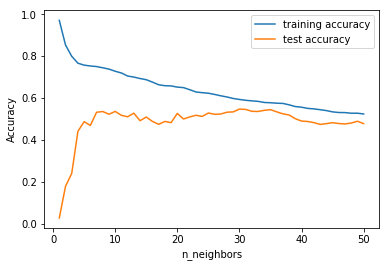

In [85]:
# Exact loop as before
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))



plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [86]:
print("The optimal number of neighbors is", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

The optimal number of neighbors is 29 with an optimal score of 0.5473217851435341


#### 12.3 KNN Optimal model neighbors = 29


In [87]:
# Building a model with k = 29
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 29)


# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)


# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)


# The score is directly comparable to R-Square
print(y_score_knn_optimal)


# Generating Predictions based on the optimal KNN model
knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

0.533846091549655


In [88]:
print(y_score_knn_optimal)

0.533846091549655


In [89]:
y_score_knn_optimal_train = knn_reg.score(X_train, y_train)
print(y_score_knn_optimal_train)

0.5980666835330413


## 13.0 OLS Regression optimal model  

In [90]:
X_train, X_test, y_train, y_test = \
    train_test_split(birth_data,
                     birth_target,
                     test_size = 0.10,
                     random_state = 508)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
# Prepping the Model
lr = LinearRegression(fit_intercept = False)


# Fitting the model
lr_fit = lr.fit(X_train, y_train)


# Predictions
lr_pred = lr_fit.predict(X_test)

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)


# The score is directly comparable to R-Square
print(y_score_ols_optimal)

0.6752355471515241


In [93]:
print(f"""
Test set predictions:
{lr_pred.round(2)[1:19]}
""")


Test set predictions:
[4206.1  3117.14 3530.64 2608.42 3852.27 3589.54 3396.27 3799.96 3566.38
 2581.78 3303.56 2779.71 2604.94 3400.27 4026.25 3675.57 3349.98 3154.72]



## 14.0 Tree Model 

In [94]:
# Importing new libraries
from sklearn.tree import DecisionTreeRegressor # Regression trees
from sklearn.tree import export_graphviz # Exports graphics
from sklearn.externals.six import StringIO # Saves an object in memory
from IPython.display import Image # Displays an image on the frontend
import pydotplus # Interprets dot objects

In [95]:
# Let's start by building a full tree.
tree_full = DecisionTreeRegressor(random_state = 508)
tree_full.fit(X_train, y_train)

Tree_Model_Testing_Score = tree_full.score(X_test, y_test).round(4)

print('Training Score', tree_full.score(X_train, y_train).round(4))
print('Tree Model_Testing Score:', tree_full.score(X_test, y_test).round(4))

Training Score 0.9856
Tree Model_Testing Score: 0.2154


In [96]:

def plot_feature_importances(model, train = X_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

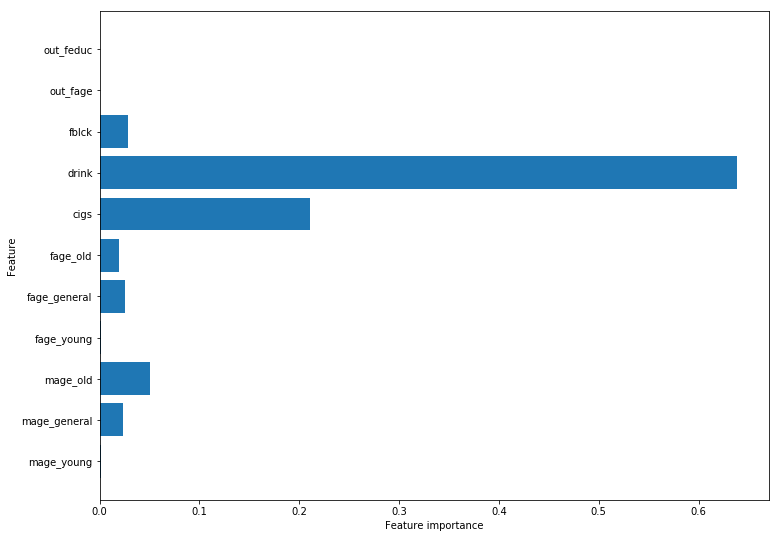

In [97]:
plot_feature_importances(tree_full,
                         train = X_train,
                         export = False)

## 15.0 KNN VS OLS VS Tree Model Prediction

In [98]:
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
Optimal model Tree score: {Tree_Model_Testing_Score.round(3)}
""")


Full model KNN score:    0.445
Optimal model KNN score: 0.534
Optimal model OLS score: 0.675
Optimal model Tree score: 0.215



## 16.0 Outputting Coefficients, Predictions, and Other Metrics for Our Most Predictive Model

In [99]:
# What does our leading model look like?
pd.DataFrame(list(zip(birth_data.columns, lr.coef_)))


,0,1
0,mage_young,2173.955193
1,mage_general,2266.193111
2,mage_old,2068.256822
3,fage_young,2172.652934
4,fage_general,2220.721230
5,fage_old,2115.030963
6,cigs,-35.736499
7,drink,-119.781538
8,fblck,5.072878
9,out_fage,-248.906187


In [100]:
# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred))).head(n = 10)

,0,1
0,3459,3479.150220
1,3810,4206.095226
2,3000,3117.144246
3,3685,3530.641658
4,2544,2608.418193
5,4050,3852.270150
6,3320,3589.542615
7,3490,3396.267393
8,3657,3799.961301
9,2770,3566.378157


### 16.1 Prediction performance

In [101]:
# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)

print(lr_rsq.round(3))

0.675


In [102]:
# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)

print(lr_mse.round(3))

84008.282


In [103]:
# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse.round(3))

289.842


### 16.2 Save prediction into excel

In [104]:
optimal_model_prediction = pd.DataFrame(list(zip(y_test, lr_pred)))
optimal_model_prediction.to_excel('Team 5_optimal_model_prediction.xlsx')

In [3]:
l1 = ["eat","sleep","repeat"] 
s1 = "geek"
  
# creating enumerate objects 
obj1 = enumerate(l1) 
obj2 = enumerate(s1) 
  
print "Return type:",type(obj1) 
print list(enumerate(l1)) 

SyntaxError: invalid syntax (<ipython-input-3-8631eccf9f2c>, line 8)

In [1]:
l1 = ["eat","sleep","repeat"] 
s1 = "geek"
obj2 = enumerate(s1) 

In [2]:
obj2